In [1]:
import pickle
import numpy as np

# Previous version: 2023
# with open("./results/params_search_ppo.pickle", 'rb') as f:
#     result = pickle.load(f)
    
# Current version: 2024
with open("./results/params_search_PPO_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

# 2023 version
indices = np.where(((b_limit == 1) * (n_limit == 1) * (q_limit == 1) * (f_limit == 1) * (tbr >= 1)) == 1)
print("indices : ", indices[0])

indices :  [3829 9009 9239 9307 9992]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


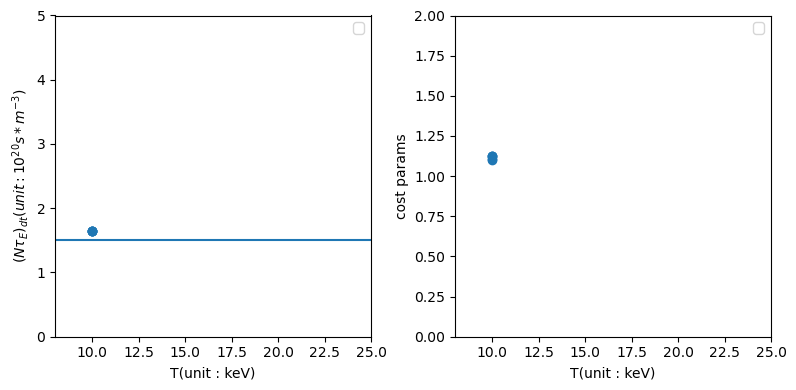

In [2]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [3]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 3.855
a : 0.857
blanket_thickness : 1.164
coil_thickness : 1.256
n : 2.296
TBR : 2.356
beta : 4.241
tau : 0.714
Ip : 7.526
q : 2.107
f_BS : 0.785
Q_parallel : 368.546
n_g : 3.264
q_kink : 2.000
beta_troyon : 4.861
f_NC : 0.822
n_tau : 1.639
n_tau_lower : 3.607
cost : 1.102
betan : 4.000
k : 1.900
epsilon : 4.500
electric_power : 503239440.918
T_avg : 10.000
B0 : 15.191
H : 1.300
armour_thickness : 0.050
RF_recirculating_rate : 0.200


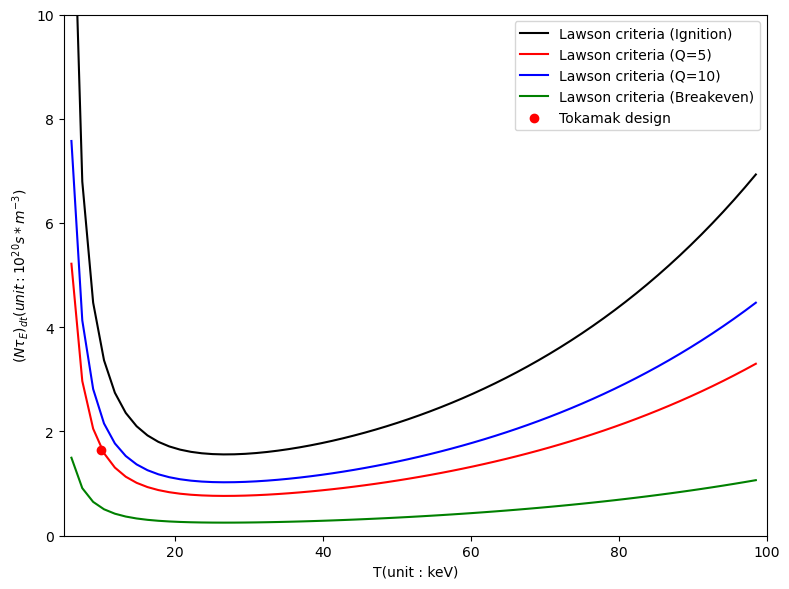

In [4]:
# Lawson curve
tau_operation = result['state'][arg_min]['tau']
T_operation = result['control'][arg_min]['T_avg']

n_tau = result['state'][arg_min]['n_tau']
n_tau_T = T * n_tau

T = np.linspace(6, 100, 64, endpoint=False)
n = result['state'][arg_min]['n'] * 10 ** 20
B = result['control'][arg_min]['B0'] * (1 - (result['state'][arg_min]['a'] + result['state'][arg_min]['blanket_thickness'])/result['state'][arg_min]['R'])

psi = 10 ** (-3)

Q = 10

n_tau = [lawson.compute_n_tau_lower_bound(t, n, B, psi) * 10 ** (-20) for t in T]
n_tau_5 = [lawson.compute_n_tau_Q_lower_bound(t, n, B, psi, 5) * 10 ** (-20) for t in T]
n_tau_Q = [lawson.compute_n_tau_Q_lower_bound(t, n, B, psi, Q) * 10 ** (-20) for t in T]
n_tau_break = [lawson.compute_n_tau_Q_lower_bound(t, n, B, psi, 1) * 10 ** (-20) for t in T]
n *= 10 ** (-20)
        
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(T, n_tau, "k", label = "Lawson criteria (Ignition)")
ax.plot(T, n_tau_5, "r", label = "Lawson criteria (Q=5)")
ax.plot(T, n_tau_Q, "b", label = "Lawson criteria (Q={})".format(Q))
ax.plot(T, n_tau_break, "g", label = "Lawson criteria (Breakeven)")
ax.scatter(T_operation, tau_operation * n, c = 'r', label = 'Tokamak design')

ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.set_xlim([5,100])
ax.set_ylim([0,10])
ax.legend()
fig.tight_layout()

### Gridsearch case

In [ ]:
import pickle
import numpy as np

with open("./results/params_search_gridsearch_solid.pkl", 'rb') as f:
    result = pickle.load(f)
    
tau = [comp['tau'] for comp in result['state']]
b_limit = result['beta_limit']
q_limit = result['q_limit']
n_limit = result['n_limit']
f_limit = result['f_limit']
i_limit = result['i_limit']
tbr = np.array([result['state'][idx]['TBR'] for idx in range(len(tau))])
T = np.array([result['control'][idx]['T_avg'] for idx in range(len(tau))])

tau = np.array(tau)
b_limit = np.array(b_limit)
q_limit = np.array(q_limit)
n_limit = np.array(n_limit)
f_limit = np.array(f_limit)
i_limit = np.array(i_limit)

indices = np.where(((b_limit == 1) * (q_limit == 1) * (n_limit == 1) * (f_limit == 1) * (tbr >= 1) * (tbr < 2)) == 1)
print("indices : ", indices[0])
print("# of cases : {}".format(len(indices[0])))

indices :  [   2    3    9 ... 9997 9998 9999]
# of cases : 1623


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


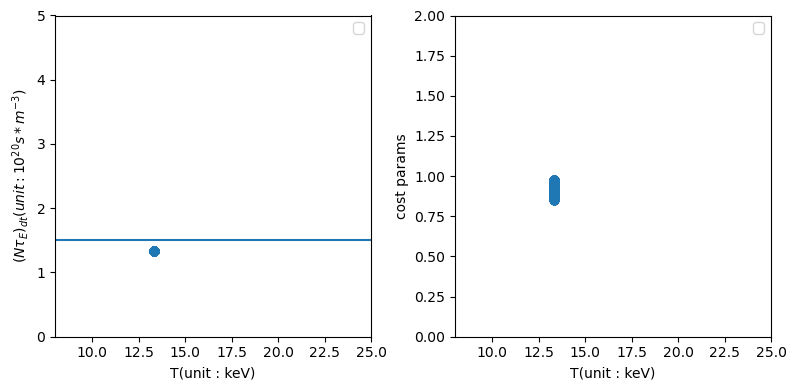

In [ ]:
# n*tau*T graph
from src.lawson import Lawson
import matplotlib.pyplot as plt

lawson = Lawson()

# Lawson-criteria
T = np.array([result['control'][idx]['T_avg'] for idx in indices[0]])
n_tau = np.array([result['state'][idx]['n_tau'] for idx in indices[0]])
n_tau_T = T * n_tau

# Cost paramter
cost = np.array([result['state'][idx]['cost'] for idx in indices[0]])

fig, axes = plt.subplots(1,2,figsize = (8,4))
axes = axes.ravel()
ax = axes[0]
ax.scatter(T, n_tau)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("$(N\\tau_E)_{dt}(unit:10^{20}s * m^{-3})$")
ax.axhline(1.5, 0, 1)
ax.set_xlim([8,25])
ax.set_ylim([0,5])
ax.legend()

ax = axes[1]
ax.scatter(T, cost)
ax.set_xlabel("T(unit : keV)")
ax.set_ylabel("cost params")
ax.set_xlim([8,25])
ax.set_ylim([0,2])
ax.legend()

fig.tight_layout()

In [ ]:
arg_min = np.argmin(cost)
arg_min = indices[0][arg_min]

for key in result['state'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['state'][arg_min][key]))
    
for key in result['control'][arg_min].keys():
    print("{} : {:.3f}".format(key, result['control'][arg_min][key]))
    

R : 6.143
a : 1.365
blanket_thickness : 1.064
coil_thickness : 0.886
n : 1.441
TBR : 1.388
beta : 3.459
tau : 0.925
Ip : 12.331
q : 2.076
f_BS : 0.074
Q_parallel : 594.780
n_g : 2.106
q_kink : 2.000
beta_troyon : 3.496
f_NC : 0.651
n_tau : 1.333
n_tau_lower : 2.664
cost : 0.851
betan : 2.833
k : 1.900
epsilon : 4.500
electric_power : 1277777777.778
T_avg : 13.333
B0 : 12.444
H : 1.000
armour_thickness : 0.050
RF_recirculating_rate : 0.189


### Reward shape engineering

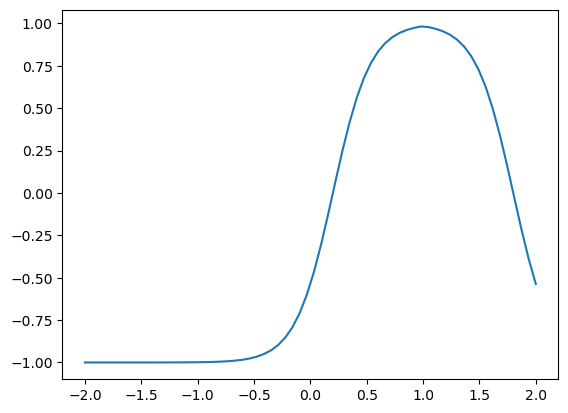

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compute_sigmoid(x):
    return math.tanh(x)

def reward_func(x, scale, a, x_min, x_max):
    xn = x / scale
    xnl = x_min / scale
    xrl = x_max / scale
    
    if xn < xrl:
        reward = compute_sigmoid(a * (xn - xnl))
    else:
        reward = compute_sigmoid(a * (2 * xrl - xnl - xn))
        
    return reward

x = np.linspace(-2,2,64)
y = np.array([reward_func(t, 1, 3, 0.2, 1.0) for t in x])

plt.plot(x,y)

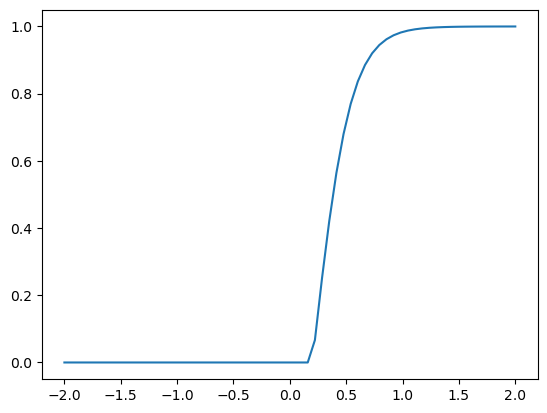

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compute_sigmoid(x):
    return math.tanh(x)

def reward_func(x, scale, a, x_min, x_max):
    xn = x / scale
    xnl = x_min / scale
    xrl = x_max / scale
    
    if xn > xnl:
        reward = compute_sigmoid(a * (xn - xnl))
    else:
        reward = 0
        
    return reward

x = np.linspace(-2,2,64)
y = np.array([reward_func(t, 1, 3, 0.2, 1.0) for t in x])

plt.plot(x,y)

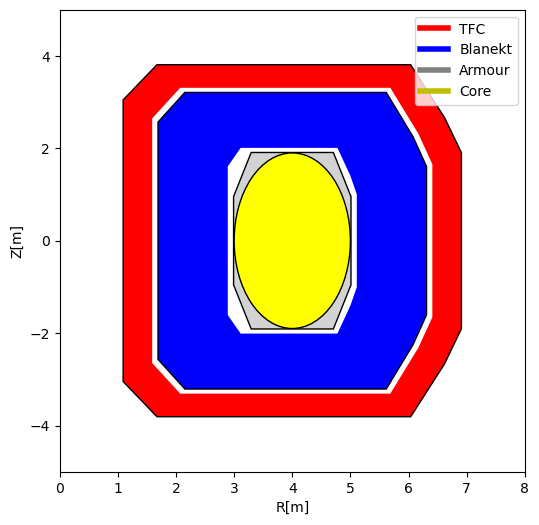

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import Axes
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import numpy as np

def draw_core(ax:Axes, R : float, a : float, b : float):
    ax.add_patch(
        patches.Ellipse(
            xy = (R, 0), # xy xy coordinates of ellipse centre.
            width = 2 * a,   # width Total length (diameter) of horizontal axis.
            height = 2 * b, # height Total length (diameter) of vertical axis.
            angle = 0, # angle Rotation in degrees anti-clockwise. 0 by default
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'yellow',
            )
    )
    
    return ax

def draw_armour(ax:Axes, R : float, a : float, b : float):
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a, -0.5*b],
                [R-0.7*a, -b], 
                [R+0.7*a, -b], 
                [R+a, -0.5 * b], 
                [R+a, 0.5*b], 
                [R+0.7*a, b], 
                [R-0.7*a, b],
                [R-a, 0.5*b]
                ]), # xy
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'lightgray',
        )
    )    
    
    return ax

def draw_blanket(ax:Axes, R : float, a_inner : float, b_inner : float, a_outer : float, b_outer : float):
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_outer*1.0, -b_outer * 0.8], 
                [R-a_outer*0.8, -b_outer * 1.0], 
                [R+a_outer*0.7, -b_outer * 1.0], 
                [R+a_outer*0.9, -b_outer * 0.7], 
                [R+a_outer*1.0, -b_outer * 0.5], 
                [R+a_outer*1.0, b_outer * 0.5], 
                [R+a_outer*0.9, b_outer * 0.7], 
                [R+a_outer*0.7, b_outer * 1.0], 
                [R-a_outer*0.8, b_outer * 1.0], 
                [R-a_outer*1.0, b_outer * 0.8]
            ]),
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'blue',
        )
    )    
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_inner*1.0, -b_inner * 0.8], 
                [R-a_inner*0.8, -b_inner * 1.0], 
                [R+a_inner*0.7, -b_inner * 1.0], 
                [R+a_inner*0.9, -b_inner * 0.7], 
                [R+a_inner*1.0, -b_inner * 0.5], 
                [R+a_inner*1.0, b_inner * 0.5], 
                [R+a_inner*0.9, b_inner * 0.7], 
                [R+a_inner*0.7, b_inner * 1.0], 
                [R-a_inner*0.8, b_inner * 1.0], 
                [R-a_inner*1.0, b_inner * 0.8]
                ]),
            closed=True,
            edgecolor = 'none',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'white',
        )
    )    
    
    return ax

def draw_coil(ax:Axes,R : float, a_inner : float, b_inner : float, a_outer : float, b_outer : float):
       
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_outer*1.0, -b_outer * 0.8], 
                [R-a_outer*0.8, -b_outer * 1.0], 
                [R+a_outer*0.7, -b_outer * 1.0], 
                [R+a_outer*0.9, -b_outer * 0.7], 
                [R+a_outer*1.0, -b_outer * 0.5], 
                [R+a_outer*1.0, b_outer * 0.5], 
                [R+a_outer*0.9, b_outer * 0.7], 
                [R+a_outer*0.7, b_outer * 1.0], 
                [R-a_outer*0.8, b_outer * 1.0], 
                [R-a_outer*1.0, b_outer * 0.8]
            ]),
            closed=True,
            edgecolor = 'black',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'red',
        )
    )    
    
    ax.add_patch(
        patches.Polygon(
            np.array([
                [R-a_inner*1.0, -b_inner * 0.8], 
                [R-a_inner*0.8, -b_inner * 1.0], 
                [R+a_inner*0.7, -b_inner * 1.0], 
                [R+a_inner*0.9, -b_inner * 0.7], 
                [R+a_inner*1.0, -b_inner * 0.5], 
                [R+a_inner*1.0, b_inner * 0.5], 
                [R+a_inner*0.9, b_inner * 0.7], 
                [R+a_inner*0.7, b_inner * 1.0], 
                [R-a_inner*0.8, b_inner * 1.0], 
                [R-a_inner*1.0, b_inner * 0.8]
                ]),
            closed=True,
            edgecolor = 'none',
            linestyle = 'solid', 
            fill = True,
            facecolor = 'white',
        )
    )    
    
    return ax

def plot_design_poloidal(
    R:float,
    a:float,
    b:float,
    d_armour:float,
    d_blanket:float,
    d_coil:float,
    x_min:float = 0,
    x_max:float = 10,
    y_min:float = -8,
    y_max:float = 8,
    ):
    
    a_armour = a + d_armour
    b_armour = b + d_armour

    a_blanket = a_armour + 0.1
    b_blanket = b_armour + 0.1

    a_coil = a_blanket + d_blanket + 0.1
    b_coil = b_blanket + d_blanket + 0.1

    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot()

    ax = draw_coil(ax, R, a_coil, b_coil, a_coil + d_coil, b_coil + d_coil)
    ax = draw_blanket(ax, R, a_blanket, b_blanket, a_blanket + d_blanket, b_blanket + d_blanket)
    ax = draw_armour(ax, R, a_armour, b_armour)
    ax = draw_core(ax, R, a, b)

    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.set_xlabel('R[m]')
    ax.set_ylabel('Z[m]')
    
    legend_elements = [
        Line2D([0],[0], color = 'r', lw = 4, label = "TFC"),
        Line2D([0],[0], color = 'b', lw = 4, label = "Blanekt"),
        Line2D([0],[0], color = 'gray', lw = 4, label = "Armour"),
        Line2D([0],[0], color = 'y', lw = 4, label = "Core"),
        ]
    ax.legend(handles = legend_elements, loc ="upper right")
    return ax
    
k = 1.9
a = 1.0
b = k*a
R = 4.0
d_armour = 0.01
d_blanket = 1.2
d_coil = 0.5

ax = plot_design_poloidal(R,a,b,d_armour,d_blanket, d_coil, 0, 8, -5, 5)

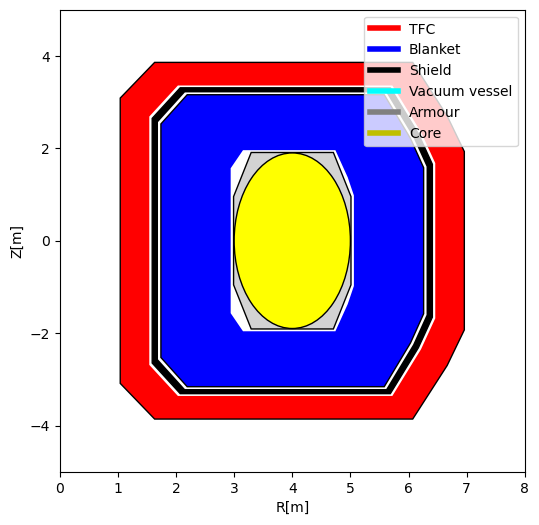

In [ ]:
from src.plot import plot_design_poloidal

k = 1.9
a = 1.0
b = k*a
R = 4.0
d_armour = 0.01
d_blanket = 1.2
d_coil = 0.5
d_shield = 0.1

ax = plot_design_poloidal(
    R,a,b,d_armour,d_blanket, d_coil, d_shield, 0, 8, -5, 5
)